In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("../Raw/metacritic_games.csv")
test = df.copy()

In [3]:
df["number_players"] = df["number_players"].fillna("no se sabe")

In [4]:
label_encoder = LabelEncoder()
df["platform"] = label_encoder.fit_transform(df["platform"])
df["genre"] = label_encoder.fit_transform(df["genre"])
df["number_players"] = label_encoder.fit_transform(df["number_players"])
df["rating"] = label_encoder.fit_transform(df["rating"])

In [5]:
df = df.drop(["developer","release_date","game"], axis=1)

In [6]:
df

,platform,genre,number_players,rating,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,1,2,35,2,51,1,0,1700,107,19,95,90
1,1,38,14,3,32,0,0,1616,322,451,94,82
2,0,28,14,2,84,1,0,283,20,5,94,90
3,1,3,35,5,27,0,0,240,34,27,91,87
4,0,2,14,1,81,1,0,251,39,11,90,84
...,...,...,...,...,...,...,...,...,...,...,...,...
5694,3,2,14,6,0,5,2,1,0,1,53,57
5695,2,3,14,6,0,7,2,1,0,0,52,18
5696,1,3,15,5,1,11,6,5,2,6,50,57
5697,2,5,14,2,3,26,22,2,2,2,49,55


<Axes: >

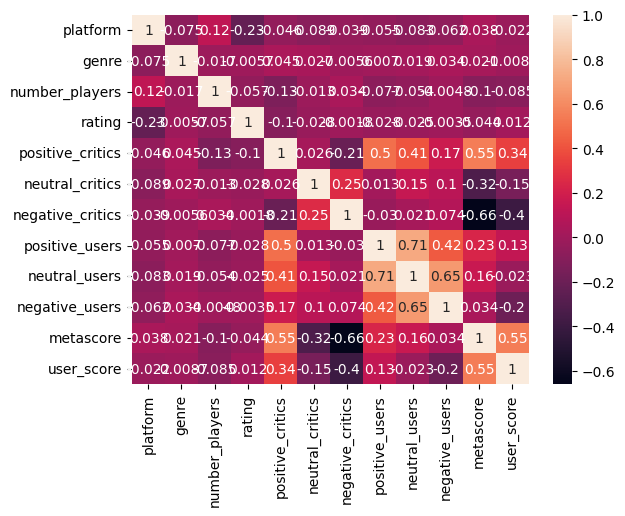

In [7]:
sns.heatmap(df.corr(), annot=True)

In [8]:
test = df.tail(1000)
df = df.drop(df.tail(1000).index)
train = df.copy()

In [9]:
#vamos a probar una regresion lineal, ya tenemos nuestra X e y
def regression(train,test, target):
    train = train.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])
    obj = train[target]
    obj_test = test[target]
    test = test.drop([target],axis=1)
    train = train.drop([target],axis=1)
    model = LinearRegression()

    X = train
    y = obj

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1)
    
    model.fit(X_train,y_train)

    pred = model.predict(test)

    print(X_train.shape)
    print(y_train.shape)
    print(pred.shape)
    print(test.shape)

    print("Media Target: ", y.mean())
    print("Intercept: ",model.intercept_)
    print("Model: ", model.coef_)
    print("R2", round(r2_score(obj_test, pred),3))
    print("MAE", round(mean_absolute_error(obj_test, pred),3))
    print("MAPE", round(mean_absolute_percentage_error(obj_test, pred),3))
    print("MSE", round(mean_squared_error(obj_test, pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(obj_test, pred)),3))
    filename = 'modelo_regression_lineal'

    with open(filename, 'wb') as archivo_salida:
        pickle.dump(model, archivo_salida)

In [10]:
regression(train, test, "user_score")

(4698, 11)
(4698,)
(1000,)
(1000, 11)
Media Target:  67.79208342200468
Intercept:  27.237423623518474
Model:  [-0.38705727 -0.02020646 -0.03945915  0.26520977  0.04637653  0.10777817
 -0.29917855  0.01896059 -0.05512877 -0.03504798  0.57015749]
R2 0.235
MAE 9.229
MAPE 0.249
MSE 168.722
RMSE 12.989
